In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
%matplotlib inline

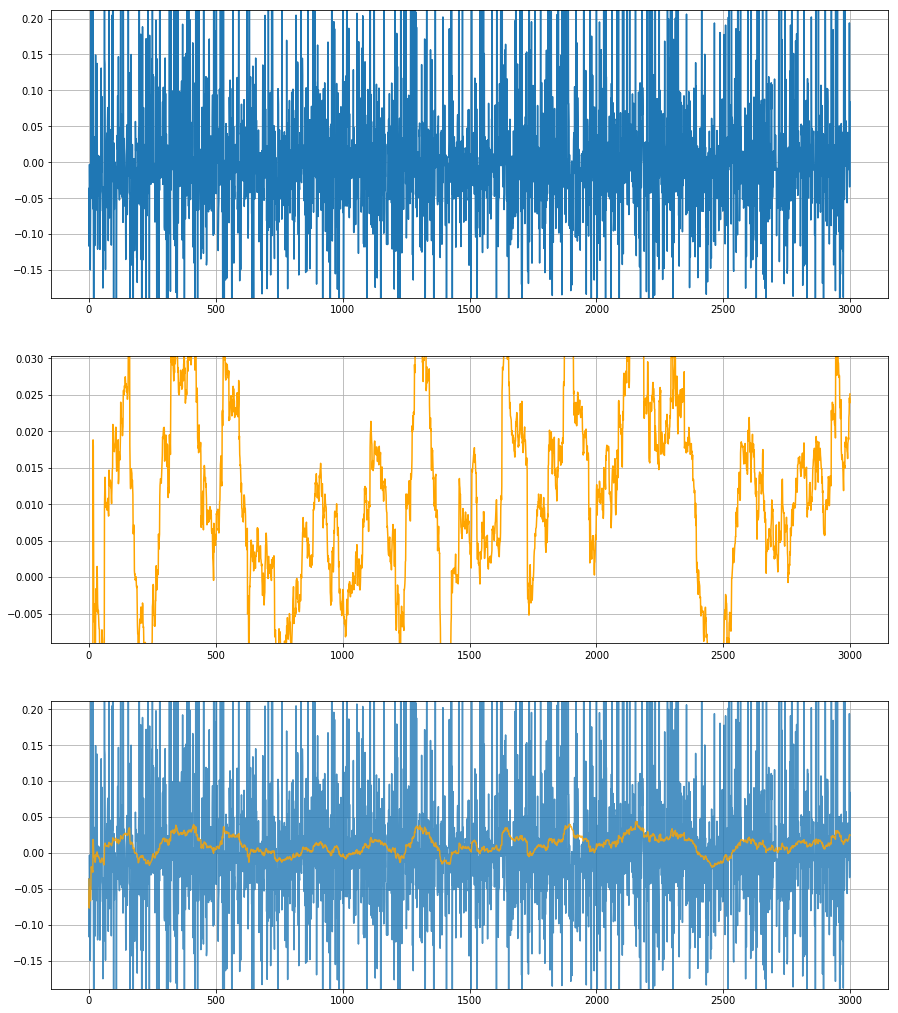

In [3]:
scores = torch.load('./saves/1/scores.pth')

window_size = 100

running_mean_scores = [np.mean(scores[max(i-window_size+1, 0):i+1]) for i in range(len(scores))]

score_mean_std   = (np.mean(scores), np.std(scores) * 1.5)
running_mean_std = (np.mean(running_mean_scores), np.std(running_mean_scores) * 1.5)

fig, axes = plt.subplots(3, 1, figsize=(15, 18))
for ax in axes:
    ax.grid(True)
    
axes[0].plot(scores)
axes[0].set_ylim(score_mean_std[0] - score_mean_std[1], score_mean_std[0] + score_mean_std[1])

axes[1].plot(running_mean_scores, color='orange')
axes[1].set_ylim(running_mean_std[0] - running_mean_std[1], running_mean_std[0] + running_mean_std[1])

axes[2].plot(scores, alpha=0.8)
axes[2].plot(running_mean_scores, color='orange', alpha=0.8)
axes[2].set_ylim(min(score_mean_std[0] - score_mean_std[1], running_mean_std[0] - running_mean_std[1]),
                 max(score_mean_std[0] + score_mean_std[1], running_mean_std[0] + running_mean_std[1]));

---